## RFInder: investigate RFI over timesteps set by the user


In [1]:
import os, string, sys
import numpy as np
import pyaml, json
from astropy.io import ascii
import logging
logger = logging.getLogger()
from IPython.display import HTML, display

import rfinder as rfinder

print '\t+------+\n\t  Done \n\t+------+'

	+------+
	  Done 
	+------+


### Load and modify parameter file

In [2]:
print '\t+------+\n\t RFInder \n\t Parameter File \n\t+------+'

rfi_par = rfinder.rfinder()

print '\t+------+\n\t Parameters Loaded \n\t+------+'

#print parameter file 
#print(json.dumps(rfi_par.cfg_par, indent=4, sort_keys=True))


INFO:rfinder:	 ... Reading parameter file ... 



	+------+
	 RFInder 
	 Parameter File 
	+------+
	+------+
	 Parameters Loaded 
	+------+


In [3]:
# Set working directory & filenames
#rfi_par.cfg_par['general']['workdir'] = '/home/maccagni/RFI/'

# Enable / disable modules
rfi_par.cfg_par['rfi']['enable'] = True
rfi_par.cfg_par['plots']['enable'] = True

#MSFILE
rfi_par.cfg_par['general']['msname'] = ['fa3_conc.ms']
rfi_par.cfg_par['general']['field'] = 1

rfi_par.set_dirs()

# CHUNKS
#create also tables of data binned in frequency and time
rfi_par.cfg_par['rfi']['chunks']['time_enable'] = True
rfi_par.cfg_par['rfi']['chunks']['time_step'] = 15 #in minutes

rfi_par.cfg_par['rfi']['chunks']['spw_enable'] = True
rfi_par.cfg_par['rfi']['chunks']['spw_width'] = 20 #MHz


#Options
#set separation in long and short baselines
rfi_par.cfg_par['rfi']['baselines_cut'] = 200 #m

#plotting options
rfi_par.cfg_par['plots']['long_short'] = False
rfi_par.cfg_par['plots']['plot_noise'] = 'rfi'

print '\t+------+\n\t Parameters modified \n\t+------+'


	+------+
	 Parameters modified 
	+------+


### Investigate presence of RFI time step by time step

INFO:rfinder_stats:	 ...  Observing time Info ... 

INFO:rfinder_stats:	 Start date: 18Jun02:03:31:05
INFO:rfinder_stats:	 End date  : 18Jun02:15:18:49 


INFO:rfi:	 ... Field, Antenna & Bandwidth Info ...

INFO:rfi:	Field with name PKS0332-403 (Field ID = 1)
INFO:rfi:	Total number of antennas:	40
INFO:rfi:	Antenna names:		[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
INFO:rfi:	Channel Width [kHz]:	208.984375
INFO:rfi:	Start         [GHz]:	0.856
INFO:rfi:	End           [GHz]:	1.71179101563

INFO:rfinder_stats:	 ...  Observing time Info ... 



Successful readonly open of default-locked table /home/maccagni/FornaxA/MeerKAT/fa3/msdir/fa3_conc.ms: 23 columns, 3740020 rows
 ------ Working on chunk #0:
	 	 between 02Jun18: 03:31 - 03:46
Successful readonly open of default-locked table /home/maccagni/FornaxA/MeerKAT/fa3/msdir/fa3_conc.ms/FIELD: 9 columns, 3 rows
Successful readonly open of default-locked table /home/maccagni/FornaxA/MeerKAT/fa3/msdir/fa3_conc.ms/ANTENNA: 8 columns, 40 rows
Successful readonly open of default-locked table /home/maccagni/FornaxA/MeerKAT/fa3/msdir/fa3_conc.ms/SPECTRAL_WINDOW: 14 columns, 1 rows
Successful readonly open of default-locked table /home/maccagni/FornaxA/MeerKAT/fa3/msdir/fa3_conc.ms: 23 columns, 3740020 rows


INFO:rfinder_stats:	 Start date: 18Jun02:03:31:05
INFO:rfinder_stats:	 End date  : 18Jun02:15:18:49 


INFO:rfinder_stats:	 ... Altitude/Azimuth info ... 



Successful readonly open of default-locked table /home/maccagni/FornaxA/MeerKAT/fa3/msdir/fa3_conc.ms: 23 columns, 3740020 rows


INFO:rfinder_stats:		 ... Altitude = [19.94168379] deg
INFO:rfinder_stats:		 ... Azimuth = [125.53150223] deg

INFO:rfinder_stats:	 ... Alt/Az done ... 

INFO:rfinder_stats:	 ...  Predicting natural r.m.s. ... 

INFO:rfinder_stats:	 Assumptions on meerkat telescope
INFO:rfinder_stats:		Dish diameter = 13.5 m
INFO:rfinder_stats:		 ... and SEFD = 578.710952 Jy
INFO:rfinder_stats:		 ... and Tsys = 30.0 K
INFO:rfinder_stats:	 Properties of observation
INFO:rfinder_stats:		 Total number of baselines = 780.0
INFO:rfinder_stats:		 Total number of channels = 4096
INFO:rfinder_stats:		 Observing time on source = 0.03332 h (2 polarisations)

INFO:rfinder_stats:	 Stokes I natural r.m.s.       = 2.069e+00 mJy/b 
INFO:rfinder_stats:	 ... Natural r.m.s. predicted ... 

INFO:rfi:	 ... info from MS file loaded  


INFO:rfi:	 ... Sorting baselines ... 

INFO:rfinder_stats:	 ... Baseline info ... 

INFO:rfinder_stats:		 Maximum baseline length     m = 7567.0
INFO:rfinder_stats:		 Minimum baseline length

KeyError: 'use_flags'

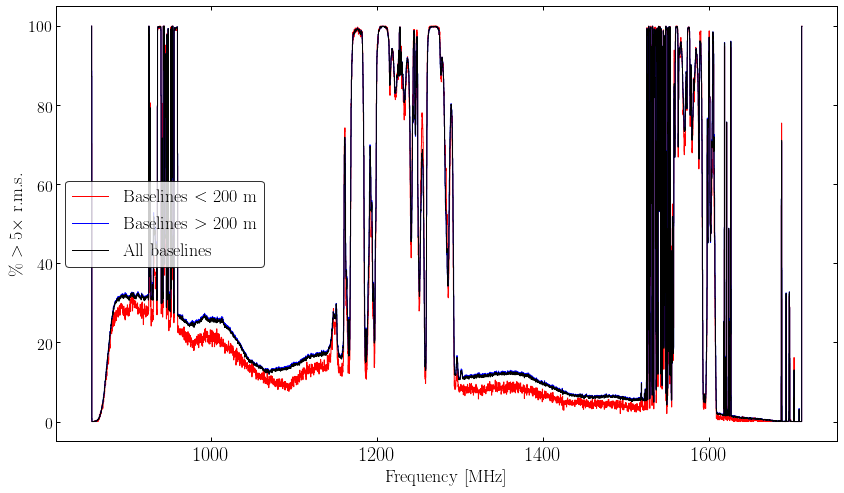

In [4]:
import rfi
import rfinder_plots as rfi_pl
import rfinder_stats as rfi_st
import rfinder_files as rfi_fl
from astropy.time import Time, TimeDelta

import rfinder_plots as rfi_pl
from astropy import units as u
rfiST = rfi_st.rfi_stats()
rfi = rfi.rfi()
rfiPL = rfi_pl.rfi_plots()



#read info from MSfile 
#rfi.load_from_ms(rfi_par.cfg_par)
times,start,end = rfiST.time_chunk(rfi_par.cfg_par)
for i in xrange(0,len(times)-1):
    timez = [times[i],times[i+1]] 

    #time chunk properties
    time_delta = float(rfi_par.cfg_par['rfi']['chunks']['time_step'])*i
    time_del = TimeDelta(time_delta*60., format='sec')
    time_delta_plus = TimeDelta(float(rfi_par.cfg_par['rfi']['chunks']['time_step'])*60., format='sec')
    start = rfi_par.cfg_par['rfi']['startdate']+time_del
    end = start+time_delta_plus

    print " ------ Working on chunk #{0:d}:".format(i)
    print "\t \t between {0:%d}{0:%b}{0:%y}: {0:%H}:{0:%M} - {1:%H}:{1:%M}".format(start.datetime,end.datetime)

    rfi.load_from_ms(rfi_par.cfg_par,timez)

    #sort visibilities by baseline lenght
    rfi.baselines_from_ms(rfi_par.cfg_par)

    #flag bad antennas (from configuration file)
    datas = rfi.priors_flag(rfi_par.cfg_par)

    #find rfi above threshold
    rfi.find_rfi(datas,rfi_par.cfg_par,i)
    rfi_fl.rfi_frequency(rfi_par.cfg_par,i)
    
    rfiPL.plot_rfi_imshow(rfi_par.cfg_par,i)
    rfi_par.cfg_par['plots']['plot_noise'] = 'rfi'
    rfi_par.cfg_par['plots']['long_short'] = False
    rfiPL.plot_noise_frequency(rfi_par.cfg_par,i)
    rfi_par.cfg_par['plots']['long_short'] = True
    rfiPL.plot_noise_frequency(rfi_par.cfg_par,i)
    rfi_par.cfg_par['plots']['plot_noise'] = 'noise_factor'
    rfiPL.plot_noise_frequency(rfi_par.cfg_par,i)
    rfi_par.cfg_par['plots']['plot_noise'] = 'noise'
    rfiPL.plot_noise_frequency(rfi_par.cfg_par,i)         
    
rfiPL.plot_altaz(rfi_par.cfg_par,i)

print '\t+------+\n\t Done \n\t+------+'